## Asian Face Image Dataset Preprocessing

In [2]:
import tensorflow as tf
import numpy as np

import pandas as pd
import cv2
import os
import math
import scipy as sp
import PIL

# Tensorflow
from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB6, ResNet50V2
#from keras_tuner.tuners import RandomSearch

import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

### load image

In [13]:
Image = tf.keras.utils.load_img(
    '../megaage_asian/train/1.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest'
    #, keep_aspect_ratio=True
)

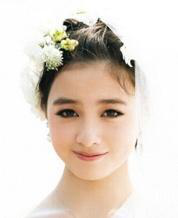

In [14]:
Image

In [15]:
type(Image)

PIL.JpegImagePlugin.JpegImageFile

### image to numpy array conversion

In [16]:
image_array = tf.keras.preprocessing.image.img_to_array(Image)

In [17]:
image_array.shape

(218, 178, 3)

In [18]:
image_array[:, :, 1]

array([[253., 253., 253., ..., 255., 255., 255.],
       [253., 253., 253., ..., 255., 255., 255.],
       [253., 253., 253., ..., 255., 255., 255.],
       ...,
       [254., 254., 254., ..., 252., 251., 251.],
       [254., 254., 255., ..., 252., 251., 251.],
       [254., 254., 255., ..., 252., 251., 251.]], dtype=float32)

## labeling

In [63]:
train_data_age = pd.read_csv('/Users/krc/Documents/megaage_asian/list/train_age.txt', header=None)

In [64]:
train_data_name = pd.read_csv('/Users/krc/Documents/megaage_asian/list/train_name.txt', header=None)

In [65]:
train_data = pd.concat([train_data_age,train_data_name], axis=1)

In [66]:
train_data

,0,0
0,18,1.jpg
1,1,2.jpg
2,9,3.jpg
3,8,4.jpg
4,30,5.jpg
...,...,...
39995,27,39996.jpg
39996,0,39997.jpg
39997,38,39998.jpg
39998,30,39999.jpg


In [67]:
train_data.columns = ['age','name']

In [68]:
train_data

,age,name
0,18,1.jpg
1,1,2.jpg
2,9,3.jpg
3,8,4.jpg
4,30,5.jpg
...,...,...
39995,27,39996.jpg
39996,0,39997.jpg
39997,38,39998.jpg
39998,30,39999.jpg


In [69]:
test_data_age = pd.read_csv('/Users/krc/Documents/megaage_asian/list/test_age.txt', header=None)

In [70]:
test_data_name = pd.read_csv('/Users/krc/Documents/megaage_asian/list/test_name.txt', header=None)

In [71]:
test_data = pd.concat([test_data_age,test_data_name], axis=1)

In [72]:
test_data

,0,0
0,1,1.jpg
1,1,2.jpg
2,2,3.jpg
3,1,4.jpg
4,1,5.jpg
...,...,...
3940,5,3941.jpg
3941,5,3942.jpg
3942,7,3943.jpg
3943,8,3944.jpg


In [73]:
test_data.columns = ['age','name']

In [74]:
test_data

,age,name
0,1,1.jpg
1,1,2.jpg
2,2,3.jpg
3,1,4.jpg
4,1,5.jpg
...,...,...
3940,5,3941.jpg
3941,5,3942.jpg
3942,7,3943.jpg
3943,8,3944.jpg


In [75]:
len(os.listdir('/Users/krc/Documents/Track_CV_Project/cropped/train'))

39949

In [85]:
train_df = pd.DataFrame(os.listdir('/Users/krc/Documents/Track_CV_Project/cropped/train'), columns=['name'])

In [76]:
len(os.listdir('/Users/krc/Documents/Track_CV_Project/cropped/test'))

3940

In [90]:
test_df = pd.DataFrame(os.listdir('/Users/krc/Documents/Track_CV_Project/cropped/test'), columns=['name'])

In [87]:
train_data = pd.merge(left=train_data, right=train_df, how='right', on='name')

In [88]:
train_data

,age,name
0,24,9733.jpg
1,32,14147.jpg
2,3,63.jpg
3,5,6400.jpg
4,0,34297.jpg
...,...,...
39944,36,35190.jpg
39945,55,32827.jpg
39946,30,6419.jpg
39947,23,1376.jpg


In [91]:
test_data = pd.merge(left=test_data, right=test_df, how='right', on='name')

In [92]:
test_data

,age,name
0,1,63.jpg
1,13,823.jpg
2,9,3578.jpg
3,33,2666.jpg
4,1,2100.jpg
...,...,...
3935,6,184.jpg
3936,46,3207.jpg
3937,1,2119.jpg
3938,6,3561.jpg


In [93]:
train_data.to_csv('train.csv', mode='a', header=False, index=False)
test_data.to_csv('test.csv', mode='a', header=False, index=False)